# Build predictive model using Facebook Prophet

### Install Prophet and its dependencies

In [1]:
# !pip3 install pystan
# !pip3 install fbprophet

In [22]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [23]:
# Utilities functions created in previous notebooks 
import pandas as pd
import os
import numpy as np

def load_dataset(subfolder='', file='aapl.us.txt', data_type='raw', index_column=0):
    data_path = os.path.join(os.path.pardir, 'data', data_type, subfolder, file)
    print('Opening file ', data_path)
    df = pd.read_csv(data_path, index_col=index_column)
    print('%d missing values found' % df.isnull().sum().sum())
    return df

### Build dataset

In [24]:
def prepare_prophet_dataset (file='dataset_feature_vector.csv', data_type='processed', initial_date='2005-01-01'):
    dataset = load_dataset('',file, data_type)
    prophet_df = pd.DataFrame()
    prophet_df['ds'] = pd.to_datetime(dataset['Date'])
    prophet_df['y'] = dataset['Open']
    # As the Open price curve is pretty still during the first years of Apple lets 
    # analyze from the moment it gets intresting 
    df = prophet_df[prophet_df.ds > pd.to_datetime(initial_date) ]
    print('Complete daset size {0}'.format(df.shape))
    return df


# def get_dataset_partitions(file='dataset_feature_vector.csv', data_type='processed', initial_date='2005-01-01', partition_date='2015-01-01')
#     df = prepare_prophet_dataset(file, data_type, initial_date)
#     train = prophet_df[(prophet_df.ds < pd.to_datetime(partition_date)) ]
# prophet_test = prophet_df[prophet_df.ds > pd.to_datetime('2015-01-01')]
# import pandas as pd
# import sklearn
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# from sklearn.utils.multiclass import unique_labels        
# print(prophet_train.shape)
# print(prophet_test.shape)


In [25]:
df = prepare_prophet_dataset ('dataset_feature_vector.csv', 'processed', '2005-01-01')

Opening file  ../data/processed/dataset_feature_vector.csv
0 missing values found
Complete daset size (3238, 2)


## Before modeling and predicting let's have a clear look of the curve that we want to model/predict

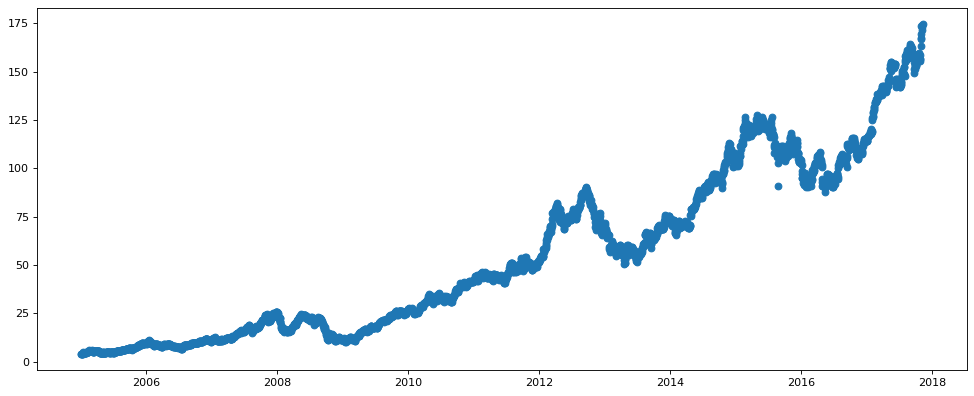

In [27]:
fig = figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x=prophet_df.ds, y=prophet_df.y)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 960x640 with 0 Axes>

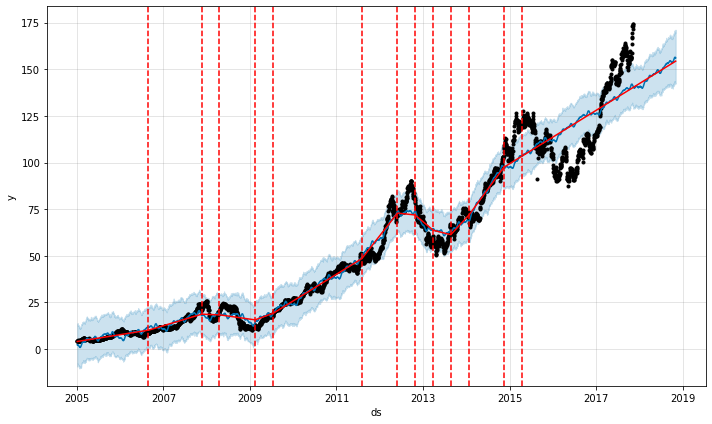

In [32]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=360, freq='d')
forecast = prophet.predict(future)

f = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
prophet.plot(forecast)
a = add_changepoints_to_plot(plt.gca(),prophet, forecast)
plt.show()

### We can see that the trend is predicted but the entire algorithmas a predictor is not strong enought without tunning the hyper-parameters